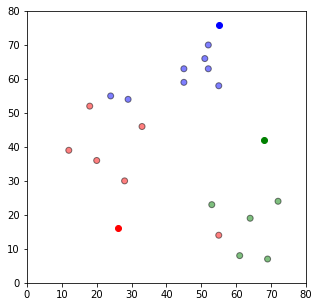

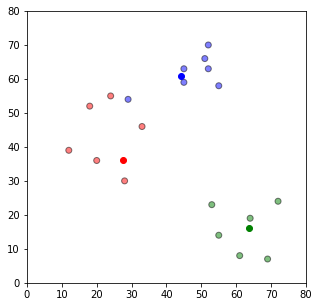

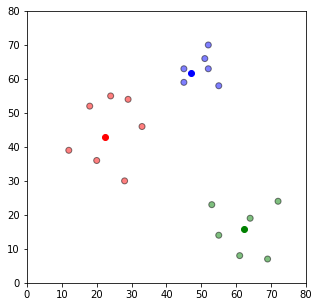

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
%matplotlib inline

# 初始化数据
df = pd.DataFrame({
    'x': [12,20,28,18,29,33,24,45,45,52,51,52,55,53,55,61,64,69,72],
    'y': [39,36,30,52,54,46,55,59,63,70,66,63,58,23,14, 8,19, 7,24]
})
#每次运行代码时设置相同的seed，则每次生成的随机数也相同，如果不设置seed，则每次生成的随机数都会不一样
np.random.seed(200)
#设置k个集群
k=3
#生成随机中心点
centroids = {
    i+1: [np.random.randint(0,80), np.random.randint(0,80)]
    for i in range(k)
}
#设置颜色
colmap = {1: 'r', 2: 'g',3: 'b'}

# 画图函数
def paint():
    #figure设置窗口尺寸，figsize设置图形的大小，参数为宽高，单位为英寸
    fig = plt.figure(figsize = (5,5))
    plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolors='k')
    colmap = {1: 'r', 2: 'g',3: 'b'}
    for i in centroids.keys():
        plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i])
    plt.xlim(0, 80)
    plt.ylim(0, 80)
    plt.show

# 分配各个点属于哪个中心函数
def assignment(df, centroids):
    for i in centroids.keys():
        #计算距离中心点的距离
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2 +
                (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    #idxmin: 返回最小值的索引 
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    #lstrip() 方法用于截掉字符串左边的空格或指定字符
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

# 更新质心函数
def update():
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])

# 画箭头
# fig = plt.figure(figsize=(5,5))
# ax = plt.axes()
# plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolors='k')
# for i in centroids.keys():
#     plt.scatter(centroids[i][0], centroids[i][1], color=colmap[i])
# plt.xlim(0,80)
# plt.ylim(0,80)
# for i in old_centroids.keys():
#     old_x = old_centroids[i][0]
#     old_y = old_centroids[i][1]
#     dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
#     dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
#     ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
# plt.show()

#先分配，改变数据的颜色，要不paint函数不能执行
df = assignment(df, centroids)

# (分配点属于哪个集群+重新更新质心) 直到质心不再变化   画图-更新-分配-不相等则画图
while True:
    #paint-copy-update-assignment-compare
    paint()
    #复制更新前的质心
    closest_centroids = df['closest'].copy(deep=True)
    #更新质心
    update()
    #以更新好的质心再次分配
    df = assignment(df, centroids)
    #如果update质心后，样本数据的最近质心索引 和 上一轮 样本数据的最近质心索引 相同则退出更新
    if closest_centroids.equals(df['closest']):
        break